<a href="https://colab.research.google.com/github/bunny-ml/Kmean-clustering/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

# Dependecies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data loading

In [3]:
df = pd.read_excel('/content/drive/MyDrive/datasets/online_retail_II.xlsx')

In [4]:
df.head(6)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [8]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


# check null quantities

In [9]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [10]:
df['Invoice'] = df["Invoice"].astype(str)

In [11]:
df[df['Invoice'].str.match('^\\d{6}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [12]:
df['Invoice'].str.replace('[0-9]', '' , regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [14]:
df['StockCode'] = df['StockCode'].astype(str)

In [15]:
x = df[~df["StockCode"].str.match(r"^\d{5}$") & ~df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$")]["StockCode"].unique()
x

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [16]:
df[df["StockCode"].str.contains('POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [17]:
df[df["StockCode"].str.match(r'^D$') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.0,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.0,United Kingdom
...,...,...,...,...,...,...,...,...
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom
503073,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
511955,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
517436,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom


In [18]:
df[df["StockCode"].str.contains('DCGS0058')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom
32045,491971,DCGS0058,MISO PRETTY GUM,2,2009-12-14 18:37:00,0.83,NaN,United Kingdom
34668,492303,DCGS0058,MISO PRETTY GUM,1,2009-12-16 11:57:00,0.83,NaN,United Kingdom
37222,492425,DCGS0058,MISO PRETTY GUM,1,2009-12-16 17:58:00,0.83,NaN,United Kingdom
40878,492782,DCGS0058,MISO PRETTY GUM,1,2009-12-18 17:06:00,0.83,NaN,United Kingdom
41260,492783,DCGS0058,MISO PRETTY GUM,2,2009-12-18 17:15:00,0.83,NaN,United Kingdom


In [19]:
df[df["StockCode"].str.contains('DCGS0068')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
62734,494918,DCGS0068,DOGS NIGHT COLLAR,1,2010-01-19 17:49:00,8.47,NaN,United Kingdom


In [20]:
df[df["StockCode"].str.contains('DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [21]:
df[df["StockCode"].str.contains('DCGS0004')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
98951,498699,DCGS0004,NaN,-2,2010-02-22 12:32:00,0.00,NaN,United Kingdom
164723,504935,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-04-19 11:19:00,16.98,NaN,United Kingdom
401083,527789,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-10-19 11:10:00,16.98,NaN,United Kingdom


In [22]:
df[df["StockCode"].str.contains("DCGS0076")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
16426,490741,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 17:56:00,16.48,NaN,United Kingdom
17265,490745,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 18:02:00,16.48,NaN,United Kingdom
20324,491043,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-09 09:51:00,16.48,NaN,United Kingdom
30673,491969,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-14 17:57:00,16.48,NaN,United Kingdom
69630,495574,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-01-25 17:36:00,16.13,NaN,United Kingdom
87575,497590,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-02-10 17:59:00,16.13,NaN,United Kingdom
118446,500695,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-03-09 12:48:00,16.13,NaN,United Kingdom
169935,505510,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-04-22 14:33:00,16.13,NaN,United Kingdom
212437,509972,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-05-26 13:34:00,16.13,NaN,United Kingdom


In [23]:
df[df["StockCode"].str.contains('C2')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.0,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
515057,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
515390,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom


In [24]:
df[df["StockCode"].str.contains('BANK CHARGES')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.0,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.0,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom


In [25]:
df[df["StockCode"].str.contains('DCGS0003')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
232222,511858,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-11 10:05:00,2.51,NaN,United Kingdom
238355,512437,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-15 16:17:00,2.51,NaN,United Kingdom
244829,513099,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-21 15:13:00,2.51,NaN,United Kingdom
267418,515287,DCGS0003,BOXED GLASS ASHTRAY,1,2010-07-09 14:58:00,2.51,NaN,United Kingdom
421518,529727,DCGS0003,BOXED GLASS ASHTRAY,1,2010-10-29 14:12:00,2.51,NaN,United Kingdom
442200,531489,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-08 15:02:00,2.51,NaN,United Kingdom
466307,533348,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-17 09:23:00,2.51,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom


In [26]:
df[df["StockCode"].str.contains('TEST001')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103.0,United Kingdom
89180,497843,TEST001,This is a test product.,5,2010-02-12 15:47:00,0.0,14827.0,United Kingdom


In [27]:
df[df["StockCode"].str.contains('gift_0001_80')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
56446,C494472,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,-1,2010-01-14 14:51:00,69.56,NaN,United Kingdom
298842,518488,gift_0001_80,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [28]:
df[df["StockCode"].str.contains('DCGS0072')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30672,491969,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-14 17:57:00,5.17,NaN,United Kingdom
34669,492303,DCGS0072,CAT CAMOUFLAGUE COLLAR,2,2009-12-16 11:57:00,5.17,NaN,United Kingdom
41261,492783,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-18 17:15:00,5.17,NaN,United Kingdom


In [29]:
df[df["StockCode"].str.contains('gift_0001_20')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
45213,493404,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-23 15:30:00,17.39,NaN,United Kingdom
75097,496247,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-01-29 16:11:00,17.02,NaN,United Kingdom
96283,498443,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-02-19 09:49:00,17.02,NaN,United Kingdom
153282,503940,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-04-08 14:47:00,17.02,NaN,United Kingdom
181337,506577,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-04-30 13:45:00,17.02,NaN,United Kingdom
195555,508077,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-05-12 16:29:00,17.02,NaN,United Kingdom
254427,513946,gift_0001_20,NaN,5,2010-06-29 13:35:00,0.00,NaN,United Kingdom
265191,515013,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-07-07 16:29:00,17.02,NaN,United Kingdom


In [30]:
df[df["StockCode"].str.contains('DCGS0044')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
33819,492226,DCGS0044,HANDZ-OFF CAR FRESHENER,1,2009-12-15 18:33:00,2.57,NaN,United Kingdom


In [31]:
df[df["StockCode"].str.contains('TEST002')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.0,NaN,United Kingdom


In [32]:
df[df["StockCode"].str.contains('gift_0001_10')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
125922,501441,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-16 13:44:00,8.51,NaN,United Kingdom
136604,502486,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-24 17:43:00,8.51,NaN,United Kingdom
218754,510637,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-06-02 11:54:00,8.51,NaN,United Kingdom
298848,518496,gift_0001_10,NaN,10,2010-08-09 12:31:00,0.00,NaN,United Kingdom
352994,523696,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-09-23 14:47:00,8.51,NaN,United Kingdom
442201,531489,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-11-08 15:02:00,8.51,NaN,United Kingdom


In [33]:
df[df["StockCode"].str.contains('gift_0001_50')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom
75136,496249,gift_0001_50,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298841,518491,gift_0001_50,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom
376731,525755,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-10-07 10:23:00,42.55,NaN,United Kingdom


In [34]:
df[df["StockCode"].str.contains('DCGS0066N')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
44245,493265,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:05:00,8.65,NaN,United Kingdom
44335,493268,DCGS0066N,NaN,1,2009-12-22 15:07:00,0.00,NaN,United Kingdom
44377,493269,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:07:00,8.65,NaN,United Kingdom
44609,493289,DCGS0066N,NaN,1,2009-12-22 15:13:00,0.00,NaN,United Kingdom


In [35]:
df[df["StockCode"].str.contains('PADS')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


In [36]:
df[df["StockCode"].str.contains('ADJUST')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.0,United Kingdom
...,...,...,...,...,...,...,...,...
208670,C509474,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,72.45,16422.0,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,358.47,17364.0,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom


In [37]:
df[df["StockCode"].str.contains('gift_0001_60')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75138,496250,gift_0001_60,NaN,3,2010-01-29 16:17:00,0.0,NaN,United Kingdom
298843,518490,gift_0001_60,NaN,10,2010-08-09 12:29:00,0.0,NaN,United Kingdom


In [38]:
df[df["StockCode"].str.contains('gift_0001_40')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75137,496248,gift_0001_40,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298847,518492,gift_0001_40,NaN,10,2010-08-09 12:30:00,0.00,NaN,United Kingdom
299652,518579,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-08-10 12:08:00,31.35,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-10-21 18:01:00,34.04,NaN,United Kingdom


In [39]:
df[df["StockCode"].str.contains('gift_0001_70')]



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75139,496251,gift_0001_70,NaN,2,2010-01-29 16:17:00,0.00,NaN,United Kingdom
235291,512168,gift_0001_70,Dotcomgiftshop Gift Voucher £70.00,1,2010-06-14 11:24:00,59.57,NaN,United Kingdom
298840,518489,gift_0001_70,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [40]:
df[df["StockCode"].str.contains('gift_0001_90')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75141,496252,gift_0001_90,NaN,2,2010-01-29 16:18:00,0.0,NaN,United Kingdom
298839,518487,gift_0001_90,NaN,10,2010-08-09 12:28:00,0.0,NaN,United Kingdom


In [41]:
df[df["StockCode"].str.contains('DCGSSGIRL')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80231,496722,DCGSSGIRL,NaN,-1,2010-02-03 14:04:00,0.00,NaN,United Kingdom
241372,512738,DCGSSGIRL,update,100,2010-06-17 14:11:00,0.00,NaN,United Kingdom
244831,513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246184,513200,DCGSSGIRL,GIRLS PARTY BAG,6,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249938,513574,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-25 15:13:00,3.36,NaN,United Kingdom
251930,513655,DCGSSGIRL,GIRLS PARTY BAG,5,2010-06-28 10:02:00,3.36,NaN,United Kingdom
253997,513907,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-29 12:08:00,3.36,NaN,United Kingdom
385192,526405,DCGSSGIRL,GIRLS PARTY BAG,6,2010-10-11 13:53:00,3.36,NaN,United Kingdom
425616,530060,DCGSSGIRL,GIRLS PARTY BAG,2,2010-11-01 11:35:00,3.36,NaN,United Kingdom
427107,530140,DCGSSGIRL,GIRLS PARTY BAG,12,2010-11-01 16:45:00,3.36,NaN,United Kingdom


In [42]:
df[df["StockCode"].str.contains('DCGS0006')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80337,496740,DCGS0006,NaN,-1,2010-02-03 14:28:00,0.0,NaN,United Kingdom


In [43]:
df[df["StockCode"].str.contains('DCGS0016')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80338,496741,DCGS0016,NaN,-1,2010-02-03 14:29:00,0.0,NaN,United Kingdom


In [44]:
df[df["StockCode"].str.contains('DCGS0027')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80339,496742,DCGS0027,NaN,-1,2010-02-03 14:29:00,0.0,NaN,United Kingdom


In [45]:
df[df["StockCode"].str.contains('DCGS0036')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80342,496744,DCGS0036,NaN,-1,2010-02-03 14:35:00,0.0,NaN,United Kingdom


In [46]:
df[df["StockCode"].str.contains('DCGS0039')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80361,496746,DCGS0039,NaN,-1,2010-02-03 14:36:00,0.0,NaN,United Kingdom


In [47]:
df[df["StockCode"].str.contains('DCGS0060')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80953,496814,DCGS0060,NaN,-3,2010-02-04 09:46:00,0.0,NaN,United Kingdom


In [48]:
df[df["StockCode"].str.contains('DCGS0056')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
81143,496855,DCGS0056,NaN,-4,2010-02-04 11:46:00,0.0,NaN,United Kingdom


In [49]:
df[df["StockCode"].str.contains('DCGS0059')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
82846,496988,DCGS0059,NaN,-8,2010-02-05 11:21:00,0.0,NaN,United Kingdom


In [50]:
df[df["StockCode"].str.contains('GIFT')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.0,NaN,United Kingdom


In [51]:
df[df["StockCode"].str.contains('DCGSLBOY')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89000,497811,DCGSLBOY,NaN,-16,2010-02-12 14:45:00,0.0,NaN,United Kingdom


In [52]:
df[df["StockCode"].str.match('^S$')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom


In [53]:
df[df["StockCode"].str.contains('DCGS0069')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
123592,501161,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-03-15 09:28:00,16.13,NaN,United Kingdom
148841,503549,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-01 15:04:00,16.13,NaN,United Kingdom
151515,503823,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-07 14:59:00,16.13,NaN,United Kingdom
405236,528145,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-10-20 15:56:00,16.13,NaN,United Kingdom


In [54]:
df[df["StockCode"].str.contains('DCGS0070')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148842,503549,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [55]:
df[df["StockCode"].str.contains('DCGS0075')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148843,503549,DCGS0075,CAMOUFLAGUE DOG LEAD,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [56]:
df[df["StockCode"].str.match('^B$')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [57]:
df[df["StockCode"].str.contains('DCGS0041')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222345,511021,DCGS0041,HAYNES MINI-COOPER PLAYING CARDS,1,2010-06-04 16:13:00,5.06,NaN,United Kingdom


In [58]:
df[df["StockCode"].str.contains('ADJUST2')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.45,16422.0,United Kingdom


In [59]:
df[df["StockCode"].str.contains('47503J')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2981,489642,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-01 16:19:00,7.95,NaN,United Kingdom
9784,490149,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-04 09:43:00,16.48,NaN,United Kingdom
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-07 15:26:00,7.95,17841.0,United Kingdom
20061,491041,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-09 09:42:00,16.48,NaN,United Kingdom
24867,C491446,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,-7,2009-12-11 10:47:00,7.95,14191.0,United Kingdom
...,...,...,...,...,...,...,...,...
356535,524004,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-09-26 16:06:00,7.95,15532.0,United Kingdom
496010,535803,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,2010-11-28 14:57:00,7.95,14410.0,United Kingdom
496295,535811,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-11-28 15:18:00,7.95,15532.0,United Kingdom
509364,536945,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-12-03 12:24:00,7.95,14083.0,United Kingdom


In [60]:
df[df["StockCode"].str.contains('C3')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.0,NaN,United Kingdom


In [61]:
df[df["StockCode"].str.contains('SP1002')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.0,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.0,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [62]:
df[df["StockCode"].str.contains('AMAZONFEE')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


# cleaning

In [63]:
cleaned_df = df.copy()

In [64]:
cleaned_df.dropna(subset="Customer ID", inplace = True)

In [65]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)
mask =(
    cleaned_df['Invoice'].str.match("^\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [66]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)
mask = (
    (cleaned_df["StockCode"].str.match("^\d{5}$") == True) |
    (cleaned_df['StockCode'].str.match("^\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.match("^PADS$") == True)

)
cleaned_df = cleaned_df[mask]
cleaned_df

<ipython-input-66-7cd3a907138e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [67]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [68]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [69]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0 ]

In [70]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [71]:
len(cleaned_df) / len(df)

0.7732429238325965

## remainig data = 77 %

#feature engineering

In [72]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

<ipython-input-72-b29a1774789e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


In [73]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [74]:
aggregated_df = cleaned_df.groupby(by= "Customer ID" , as_index = False) \
.agg(
    MonetaryValue = ("SalesLineTotal" , "sum"),
    Frequency = ("Invoice" , "nunique"),
    LastInvoiceDate = ("InvoiceDate" , "max")
)

aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00
4281,18284.0,411.68,1,2010-10-04 11:33:00
4282,18285.0,377.00,1,2010-02-17 10:24:00
4283,18286.0,1246.43,2,2010-08-20 11:57:00


In [75]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

In [76]:
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [77]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [78]:
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17
4281,18284.0,411.68,1,2010-10-04 11:33:00,66
4282,18285.0,377.00,1,2010-02-17 10:24:00,295
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111


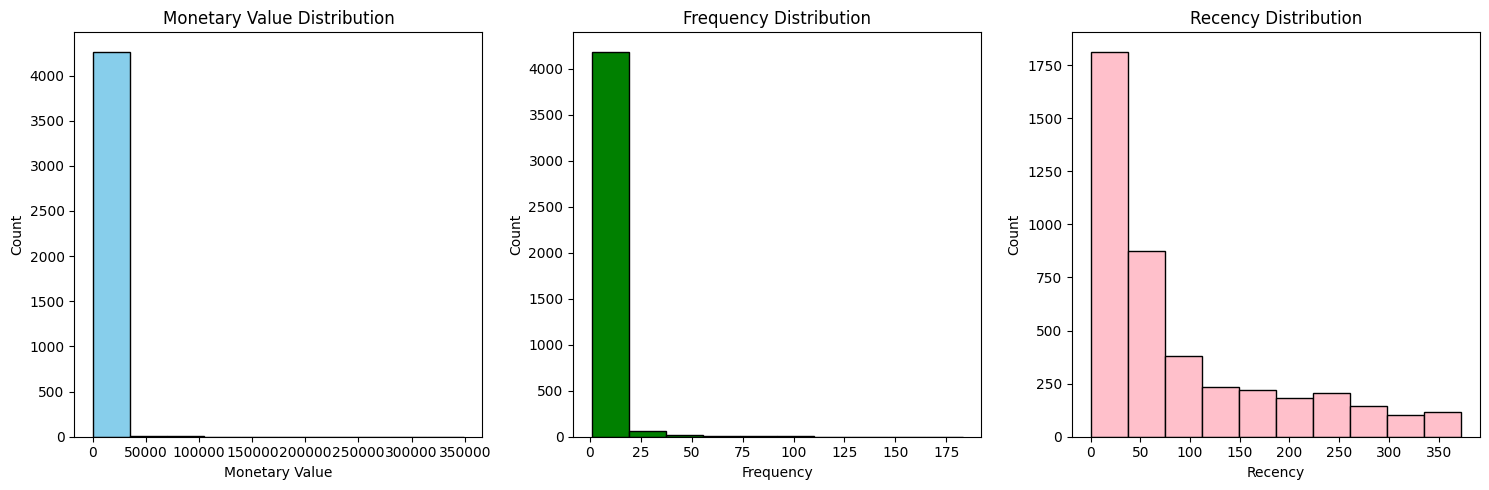

In [79]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"] , bins=10 ,color= 'skyblue' , edgecolor='black' )
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"] , bins=10 ,color= 'green' , edgecolor='black' )
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"] , bins=10 ,color= 'pink' , edgecolor='black' )
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

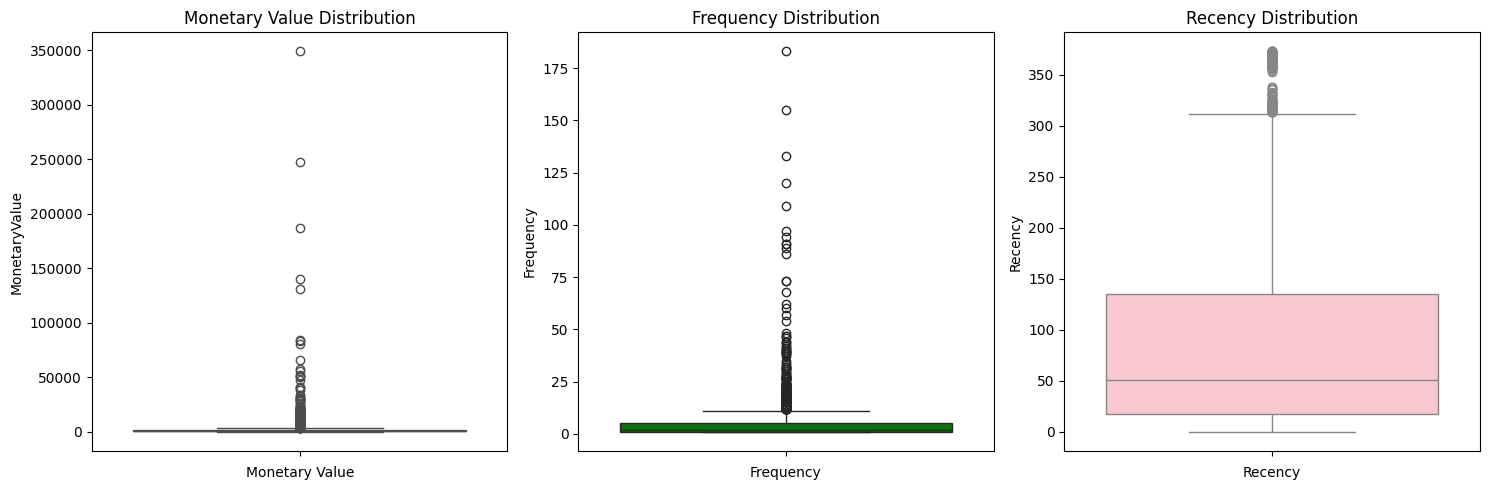

In [80]:
plt.figure(figsize=(15 ,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["MonetaryValue"] , color= "red")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"] , color= "green")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"] , color= "pink")
plt.title("Recency Distribution")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

In [81]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1
monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5  * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

In [82]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [83]:
M_Q1 = aggregated_df["Frequency"].quantile(0.25)
M_Q3 = aggregated_df["Frequency"].quantile(0.75)
M_IQR = M_Q3 - M_Q1
frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (M_Q3 + 1.5  * M_IQR)) | (aggregated_df["Frequency"] < (M_Q1 - 1.5 * M_IQR))].copy()

In [84]:
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [85]:
M_Q1 = aggregated_df["Recency"].quantile(0.25)
M_Q3 = aggregated_df["Recency"].quantile(0.75)
M_IQR = M_Q3 - M_Q1
recency_outliers_df = aggregated_df[(aggregated_df["Recency"] > (M_Q3 + 1.5  * M_IQR)) | (aggregated_df["Recency"] < (M_Q1 - 1.5 * M_IQR))].copy()

In [86]:
recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.000000,167.000000,167.000000,167,167.000000
mean,15429.029940,418.318868,1.251497,2009-12-23 13:52:27.664670720,350.970060
min,12439.000000,2.950000,1.000000,2009-12-01 10:49:00,314.000000
25%,14115.500000,147.350000,1.000000,2009-12-07 13:03:00,328.500000
50%,15413.000000,231.900000,1.000000,2009-12-14 15:07:00,360.000000
75%,16812.000000,356.175000,1.000000,2010-01-14 23:56:00,367.000000
max,18201.000000,9471.500000,7.000000,2010-01-29 14:22:00,373.000000
std,1629.838337,950.151329,0.796971,NaN,20.513124


In [87]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

In [88]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


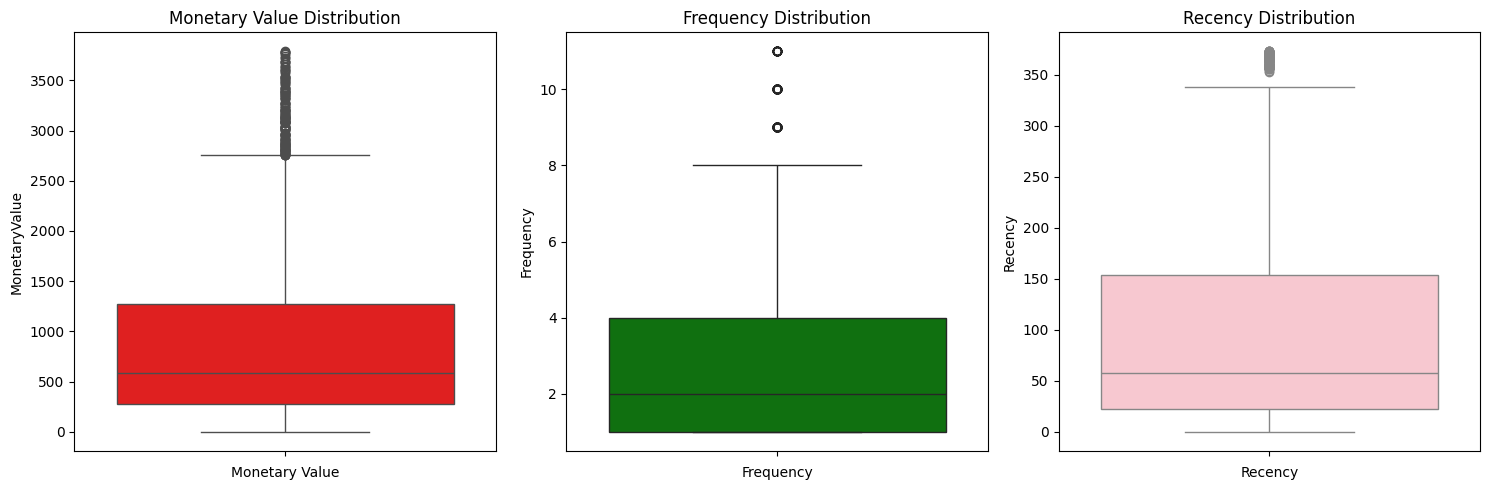

In [89]:
plt.figure(figsize=(15 ,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"] , color= "red")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"] , color= "green")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"] , color= "pink")
plt.title("Recency Distribution")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

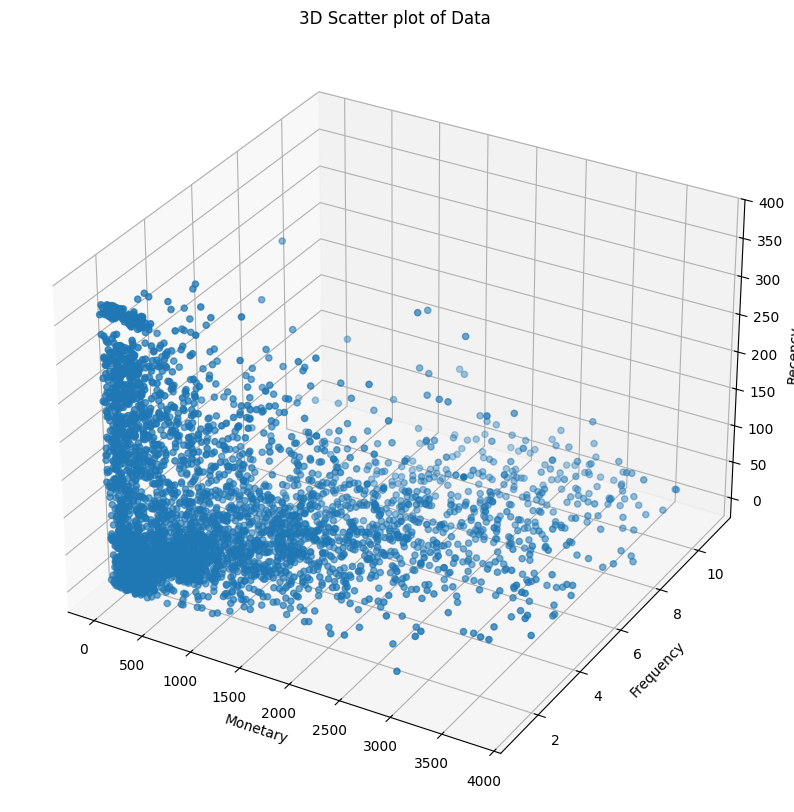

In [90]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"] , non_outliers_df["Recency"])

ax.set_xlabel("Monetary")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Data")
plt.show()

In [91]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue' , 'Frequency' , 'Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [92]:
scaled_data_df = pd.DataFrame(scaled_data , index = non_outliers_df.index , columns = ['MonetaryValue' , 'Frequency' , 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


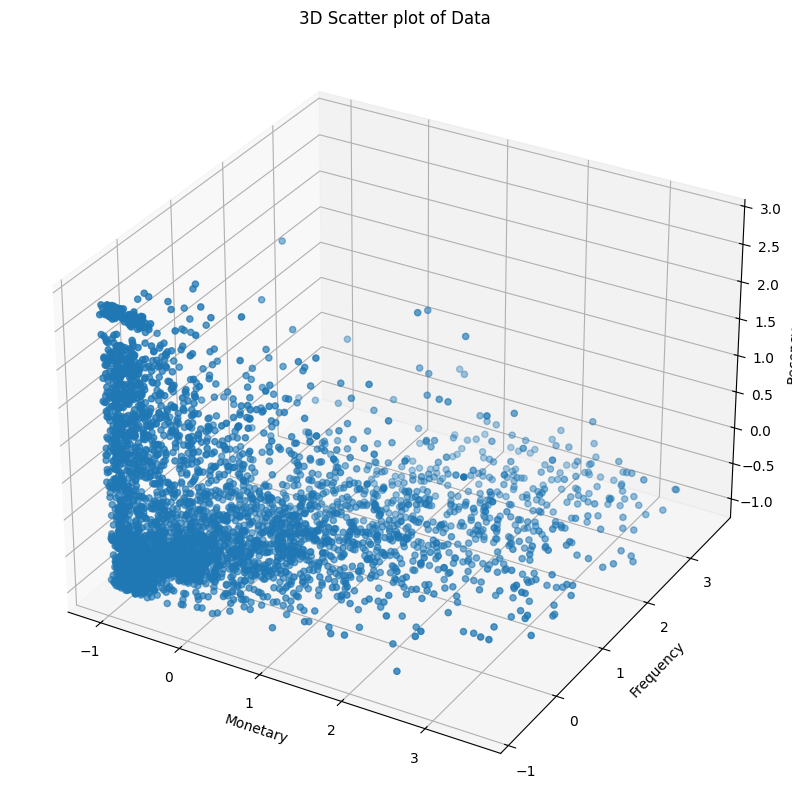

In [93]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"] , scaled_data_df["Recency"])

ax.set_xlabel("Monetary")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Data")
plt.show()

# using L bow & Silhouette score method to find the no. of clusters is best for the data

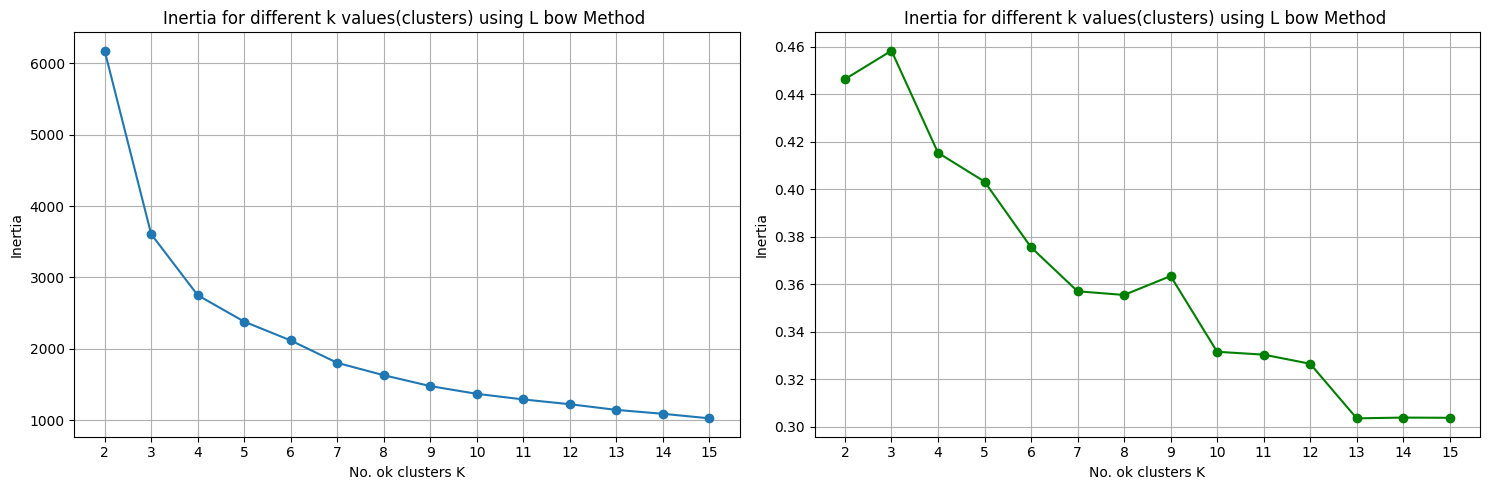

In [94]:
max_k = 15
inertia = []
silhouette_scores = []
k_values =range(2 , max_k + 1)

for k in k_values:
    kMeans = KMeans(n_clusters=k , random_state= 69 , max_iter=1200 )
    label = kMeans.fit_predict(scaled_data_df)
    inertia.append(kMeans.inertia_)
    sil_score = silhouette_score(scaled_data_df , label)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.plot(k_values , inertia , marker='o')
plt.title("Inertia for different k values(clusters) using L bow Method ")
plt.xlabel("No. ok clusters K")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values , silhouette_scores , marker='o' , color = 'green')
plt.title("Inertia for different k values(clusters) using L bow Method ")
plt.xlabel("No. ok clusters K")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [95]:
kMeans = KMeans(n_clusters=4, random_state=69 , max_iter=1200)
cluster_labels = kMeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 0, 3, ..., 2, 0, 0], dtype=int32)

In [96]:
non_outliers_df["cluster"] = cluster_labels
non_outliers_df

<ipython-input-96-696eb89d8566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,2
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,3
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,2
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


In [97]:
non_outliers_df['cluster'].unique()

array([2, 0, 3, 1], dtype=int32)

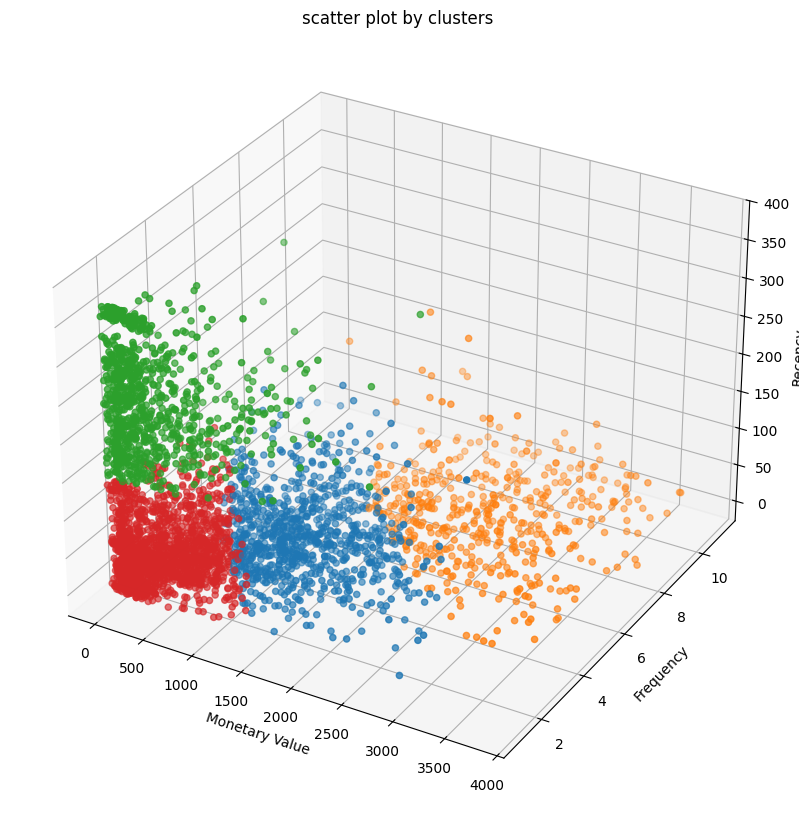

In [98]:
cluster_color = {
    0:'#1f77b4', #blue
    1:'#ff7f0e' ,#orange
    2:'#2ca02c' ,#green
    3: '#d62728' ,#red
}
colors = non_outliers_df['cluster'].map(cluster_color)

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("scatter plot by clusters")

plt.show()

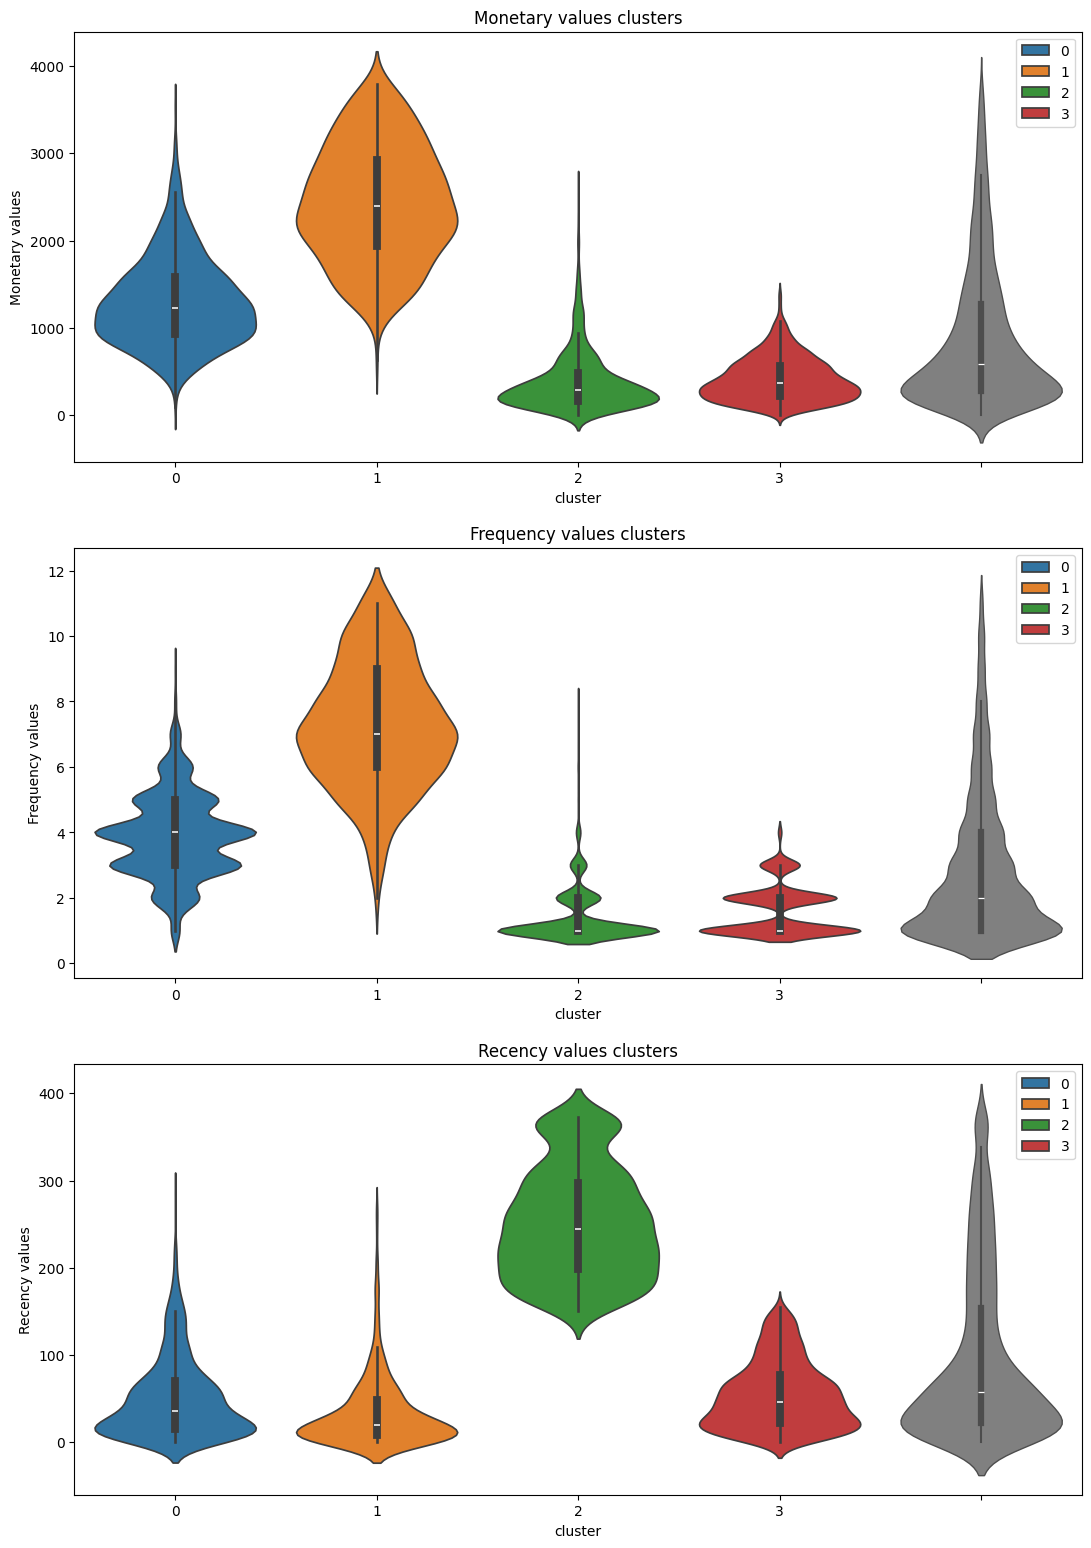

In [99]:
cluster_color = {
    0:'#1f77b4', #blue
    1:'#ff7f0e' ,#orange
    2:'#2ca02c' ,#green
    3: '#d62728' ,#red
}
plt.figure(figsize=(13,19))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['cluster'],y = non_outliers_df['MonetaryValue'], palette= cluster_color , hue= non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color = 'gray' , linewidth=1.0)
plt.title("Monetary values clusters")
plt.ylabel('Monetary values')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['cluster'],y = non_outliers_df['Frequency'], palette=cluster_color , hue=non_outliers_df['cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color = 'gray' , linewidth=1.0)
plt.title("Frequency values clusters")
plt.ylabel('Frequency values')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['cluster'],y = non_outliers_df['Recency'], palette=cluster_color , hue=non_outliers_df['cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color = 'gray' , linewidth=1.0)
plt.title("Recency values clusters")
plt.ylabel('Recency values')

plt.show()


In [100]:
overplap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overplap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overplap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overplap_indices]

monetary_only_outliers['cluster'] = -1
frequency_only_outliers['cluster'] = -2
monetary_and_frequency_outliers['cluster'] = -3

outlier_cluster_df = pd.concat([monetary_only_outliers , frequency_only_outliers , monetary_and_frequency_outliers])
outlier_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


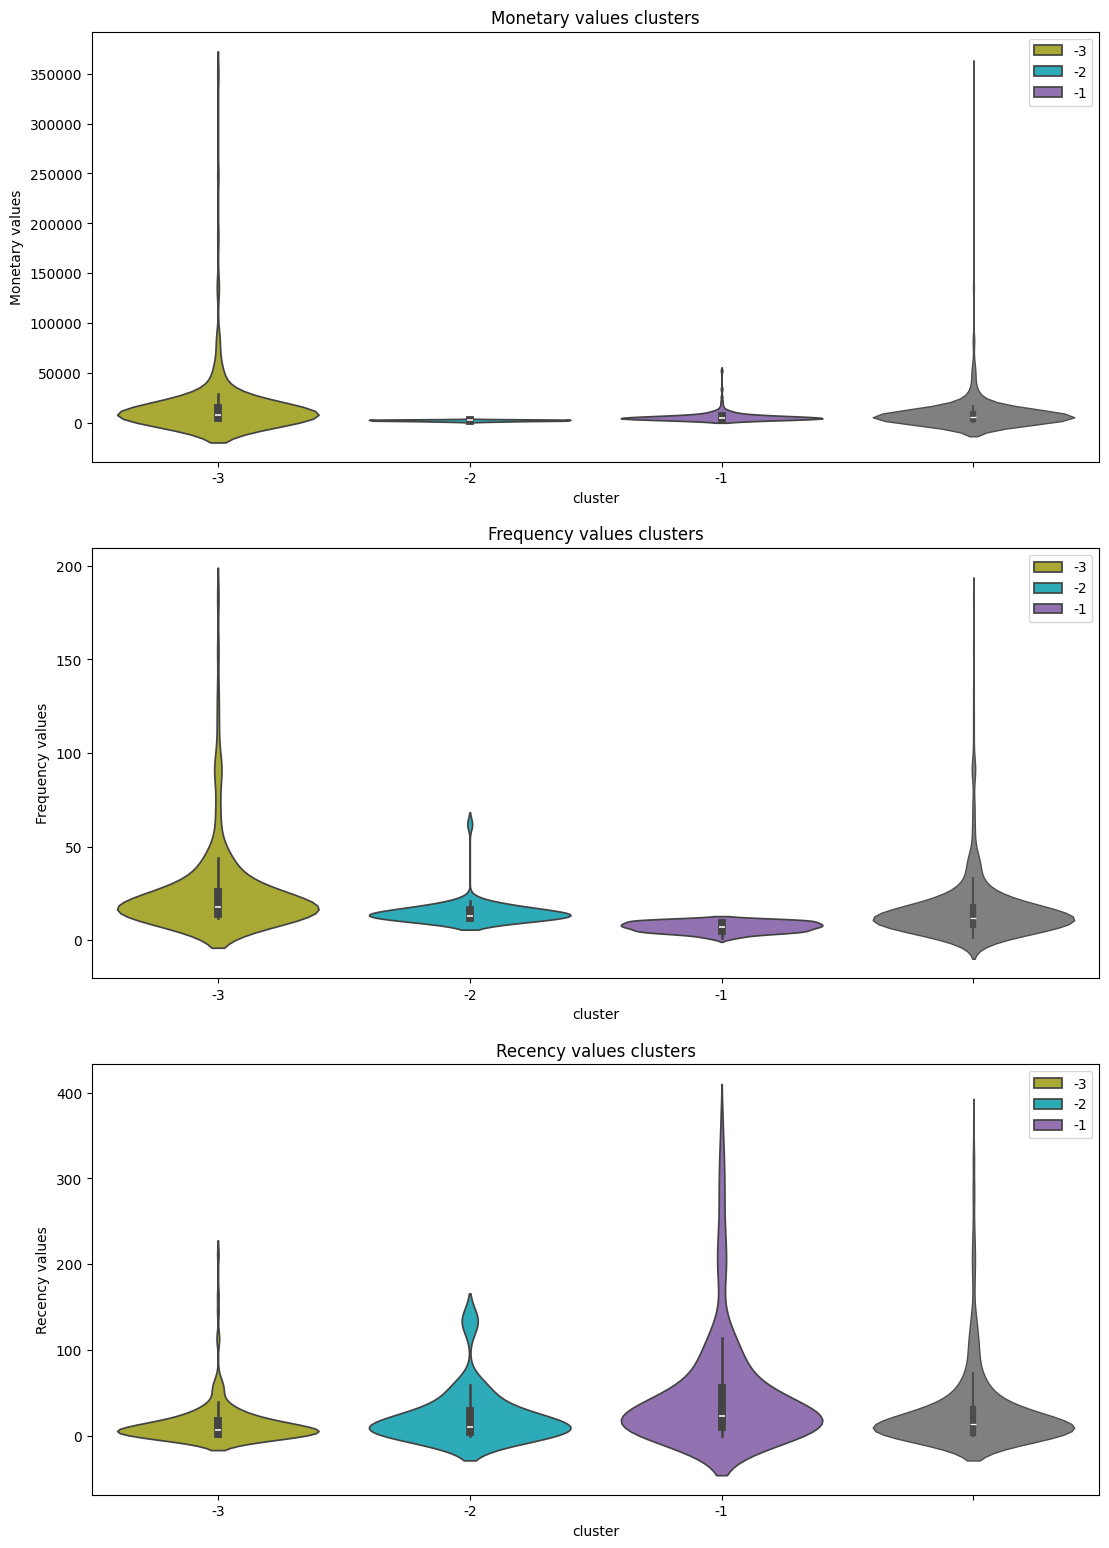

In [101]:
cluster_color = {
    -1:'#9467bd', #purple
    -2:'#17becf' ,#cyan
    -3:'#bcbd22' ,#yellow-green
}

plt.figure(figsize=(13,19))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_cluster_df['cluster'],y = outlier_cluster_df['MonetaryValue'], palette= cluster_color , hue= outlier_cluster_df["cluster"])
sns.violinplot(y=outlier_cluster_df['MonetaryValue'], color = 'gray' , linewidth=1.0)
plt.title("Monetary values clusters")
plt.ylabel('Monetary values')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_cluster_df['cluster'],y = outlier_cluster_df['Frequency'], palette=cluster_color , hue=outlier_cluster_df['cluster'])
sns.violinplot(y=outlier_cluster_df['Frequency'], color = 'gray' , linewidth=1.0)
plt.title("Frequency values clusters")
plt.ylabel('Frequency values')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_cluster_df['cluster'],y = outlier_cluster_df['Recency'], palette=cluster_color , hue=outlier_cluster_df['cluster'])
sns.violinplot(y=outlier_cluster_df['Recency'], color = 'gray' , linewidth=1.0)
plt.title("Recency values clusters")
plt.ylabel('Recency values')

plt.show()

In [104]:
cluster_labels = {
    0:'RETAIN',
    1:'REWARD',
    2:'RE-ENGAGE',
    3:'NURTURE',
    -1:'PAMPER',
    -2:'UPSELL',
    -3:'DELIGHT'
}

In [103]:
full_clustering_df = pd.concat([non_outliers_df , outlier_cluster_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,2
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [105]:
full_clustering_df["cluster label"] = full_clustering_df['cluster'].map(cluster_labels)

In [106]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster,cluster label
0,12346.0,169.36,2,2010-06-28 13:53:00,164,2,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT
